In [ ]:
# Objective- Based on the given features such as Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,
#Pressure_millibars,Current_weather_condition ,we need to predict the Future_weather_condition

In [49]:
import pandas as pd
import numpy as np
import warnings
from math import sqrt
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [50]:
df = pd.read_csv('weather.csv')
df.head()

,Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition,Future_weather_condition
0,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,0.83,11.0446,259,15.8263,1016.51,1,1
1,2006-04-01 05:00:00+02:00,"Port of Turku, Finland",9.222222,0.85,13.9587,258,14.9569,1016.66,1,1
2,2006-04-01 06:00:00+02:00,"Port of Turku, Finland",7.733333,0.95,12.3648,259,9.9820,1016.72,1,1
3,2006-04-01 07:00:00+02:00,"Port of Turku, Finland",8.772222,0.89,14.1519,260,9.9820,1016.84,1,1
4,2006-04-01 08:00:00+02:00,"Port of Turku, Finland",10.822222,0.82,11.3183,259,9.9820,1017.37,1,1


In [51]:
df.isnull().sum()#checking if there is any null values

Timestamp                    0
Location                     0
Temperature_C                0
Humidity                     0
Wind_speed_kmph              0
Wind_bearing_degrees         0
Visibility_km                0
Pressure_millibars           0
Current_weather_condition    0
Future_weather_condition     0
dtype: int64

In [52]:
df_training = df.iloc[:77160]
df_training.shape# checking the shape of training data

(77160, 10)

In [53]:
df_validation = df.drop(df_training.index)
df_validation.shape#checking the shape of validation data


(19289, 10)

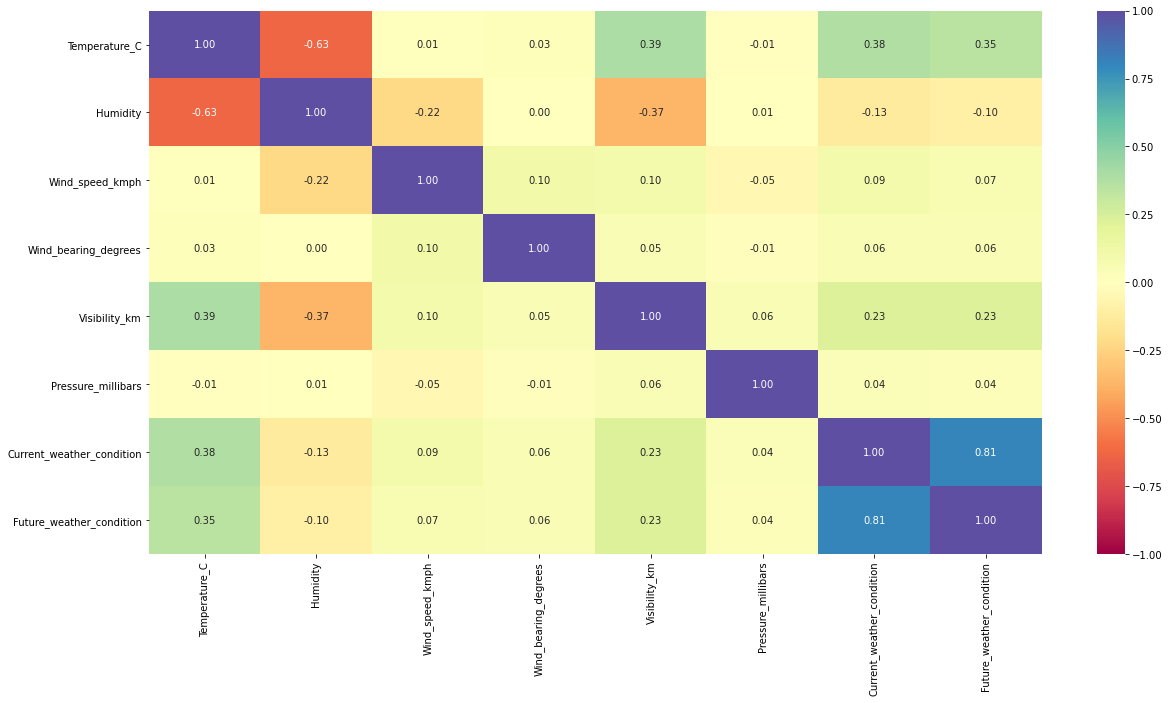

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()#checking the correlation of features

In [55]:
# selected columns'Temperature_C','Current_weather_condition','Visibility_km' as they are highly correlated with the target columns
X = df[['Temperature_C','Current_weather_condition','Visibility_km']].values
y = df['Future_weather_condition'].values

In [56]:
df['Future_weather_condition'].unique()

array([1, 0], dtype=int64)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1) # spliting the dataset into train and test

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [59]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [61]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, features, target):
    
    # predicting using the independent variables
    pred = model.predict(features)
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [62]:
def confusion_matrix_sklearn(model, features, target):
   
    y_pred = model.predict(features)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [63]:
svm=SVC()
svm.fit(X_train,y_train)
svm_yhat=svm.predict(X_test)

In [64]:
print('accuracy score of the support vector machines model is {}'.format(accuracy_score(y_test,svm_yhat)))

accuracy score of the support vector machines model is 0.9505961638154484


In [65]:
print('F1 score of the support vector machines model is {}'.format(f1_score(y_test,svm_yhat)))

F1 score of the support vector machines model is 0.9711553013105724


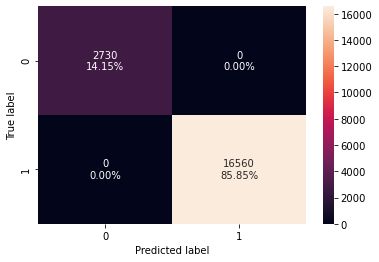

In [66]:
confusion_matrix_sklearn(svm, X_test, svm_yhat)

In [67]:
print(classification_report(y_test,svm_yhat))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2811
           1       0.97      0.97      0.97     16479

    accuracy                           0.95     19290
   macro avg       0.90      0.89      0.90     19290
weighted avg       0.95      0.95      0.95     19290



In [68]:
#Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [71]:
lr_yhat=lr.predict(X_test)

In [72]:
print('accuracy score of the support vector machines model is {}'.format(accuracy_score(y_test,lr_yhat)))

accuracy score of the support vector machines model is 0.9493001555209953


In [73]:
print('F1 score of the support vector machines model is {}'.format(f1_score(y_test,lr_yhat)))

F1 score of the support vector machines model is 0.9703582469539915


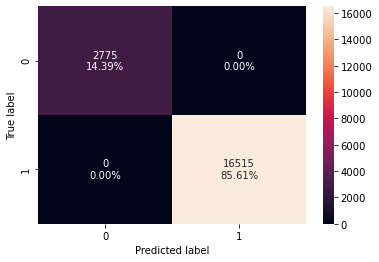

In [74]:
confusion_matrix_sklearn(lr, X_test, lr_yhat)

In [75]:
print(classification_report(y_test, lr_yhat))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2811
           1       0.97      0.97      0.97     16479

    accuracy                           0.95     19290
   macro avg       0.90      0.90      0.90     19290
weighted avg       0.95      0.95      0.95     19290



In [ ]:
# Both SVM and Logistic Regression is performing good as they shows an accuracy of 95 percent. 